# Assignment1
## Smart watch(Linear Regression)

### Since you are a student of Coding Club, you are expected to work hard and get better results than others. To track your time and expected performance in the Machine Learning Challenge, Rishabh bhaiya has asked you to install walkatime on your device which is an efficient time tracking tool to track your daily coding activity. In this challenge, Rishabh bhaiya gives you walkatime data of his past students and how they performed in the evaluation exam. Your task is to predict the score you will get given the amount of time you spend on coding daily. 
### Input- You are given one feature corresponding to time noted by walkatime.
### Output- A scalar denoting the level of performance students achieved by devoting the given time.
### Please find the attached training and testing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x_train=pd.read_csv('Linear_X_Train.csv')
print(x_train.head())
print(x_train.shape)
x_train=x_train.values.reshape(-1)
print(x_train.shape)
print(x_train)

          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043
(3750, 1)
(3750,)
[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]


In [21]:
y_train=pd.read_csv('Linear_Y_Train.csv')
print(y_train.head())
print(y_train.shape)
y_train=y_train.values.reshape(-1)
print(y_train.shape)
print(y_train)

           y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187
(3750, 1)
(3750,)
[-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


In [46]:
x_train=(x_train-x_train.mean())/x_train.std()

In [22]:
x_test=pd.read_csv('Linear_X_Test.csv')
print(x_test.head())
print(x_test.shape)
x_test=x_test.values.reshape(-1)
print(x_test.shape)
print(x_test)

          x
0 -1.877944
1 -0.869032
2 -2.530182
3  2.760205
4  0.591000
(1250, 1)
(1250,)
[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


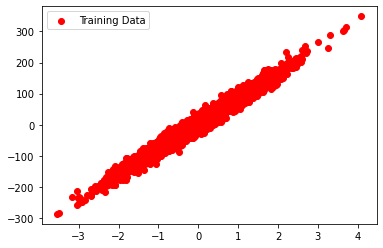

In [8]:
plt.scatter(x_train,y_train,color='red',label='Training Data')
plt.legend()
plt.show()

In [9]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [39]:
def error(x,theta,y):
    err=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta);
        err+=(y[i]-hx)**2
    return err

In [40]:
def gradient(x,theta,y):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i])*x[i]
    return grad

In [41]:
def gradient_descent(x,y,learning_rate=0.01):
    theta=[1.0,0.5]
    err_list=[]
    theta_list=[]
    for i in range(100):
        err=error(x,theta,y)
        err_list.append(err)
        theta_list.append(theta)
        d=gradient(x,theta,y)
        theta[0]-=learning_rate*d[0]
        theta[1]-=learning_rate*d[1]
    return theta,err_list,theta_list

In [47]:
final_value,error_list,theta_list=gradient_descent(x_train,y_train)

In [48]:
print(final_value)

[0.6838689680155892, 79.90573694249977]


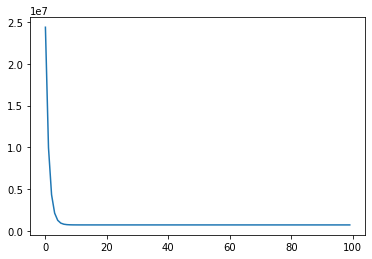

In [49]:
plt.plot(error_list)
plt.show()

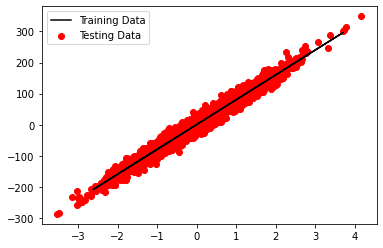

In [50]:
x=x_test
y=final_value[0]+final_value[1]*x
plt.plot(x,y,color='black',label='Training Data')
plt.scatter(x_train,y_train,color='red',label='Testing Data')
plt.legend()
plt.show()

# Inbuilt Library

In [51]:
x_train=pd.read_csv('Linear_X_Train.csv')
print(x_train.head())
print(x_train.shape)

          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043
(3750, 1)


In [52]:
y_train=pd.read_csv('Linear_Y_Train.csv')
print(y_train.head())
print(y_train.shape)

           y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187
(3750, 1)


In [53]:
x_test=pd.read_csv('Linear_X_Test.csv')
print(x_test.head())
print(x_test.shape)

          x
0 -1.877944
1 -0.869032
2 -2.530182
3  2.760205
4  0.591000
(1250, 1)


In [54]:
#Normalisation
x_train=(x_train-x_train.mean())/x_train.std()
print(x_train.head())
print(x_train.shape)

          x
0 -0.253487
1 -0.555340
2  1.073663
3 -0.222955
4  0.826272
(3750, 1)


In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [57]:
model.fit(x_train,y_train)

LinearRegression()

In [58]:
model.score(x_train,y_train)

0.9709612233822353

In [62]:
bias=model.intercept_
coeff=model.coef_
print(bias,coeff)

[0.68386897] [[79.91639317]]


In [63]:
output=model.predict(x_test)
print(output)

[[-149.39467518]
 [ -68.7660273 ]
 [-201.51918447]
 ...
 [  10.91379233]
 [ -21.53589237]
 [ -53.6932771 ]]


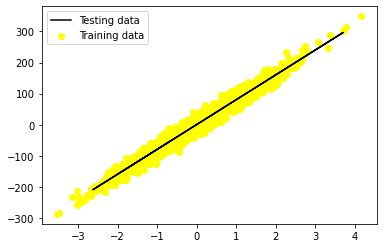

In [64]:
plt.scatter(x_train,y_train,color='yellow',label='Training data')
plt.plot(x_test,output,color='black',label='Testing data')
plt.legend()
plt.show()